In [1]:
import numpy as np

In [259]:
def torus_points(r1, r2, n=10):
    u = np.linspace(0, 2*np.pi, n)
    v = np.linspace(0, 2*np.pi, n)
    uu, vv = np.meshgrid(u, v)
    x = (r1 + r2*np.cos(vv))*np.cos(uu)
    y = (r1 + r2*np.cos(vv))*np.sin(uu)
    z = r2*np.sin(vv)
    return np.stack([x,y,z]).T.reshape(-1, 3)

In [260]:
torus_points(2, 1).shape

(100, 3)

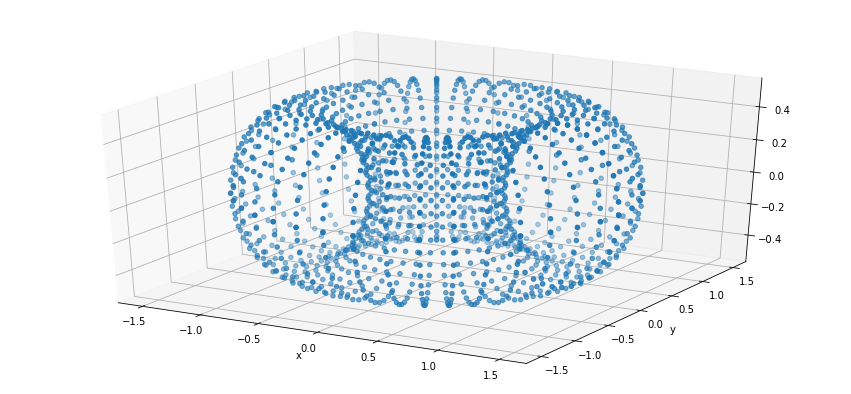

In [455]:
import matplotlib.pyplot as plt

def plot_points(points):
    fig = plt.figure(figsize=(15,7))
    ax = plt.axes(projection="3d")
    ax.scatter(points[:, 0], points[:, 1], points[:, 2])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
points = torus_points(1,0.5,40)
plot_points(points)

In [324]:
def torus_tangents(r1, r2, n=10):
    u = np.linspace(0, 2*np.pi, n)
    v = np.linspace(0, 2*np.pi, n)
    uu, vv = np.meshgrid(u, v)
    x = (r1 + r2*np.cos(vv))*np.cos(uu)
    y = (r1 + r2*np.cos(vv))*np.sin(uu)
    z = r2*np.sin(vv)
    
    t_u = np.stack([-np.sin(uu), np.cos(uu), uu*0])
    t_v = np.stack([-np.cos(uu)*np.sin(vv),
                    -np.sin(uu)*np.sin(vv),
                     np.cos(vv)])
    # 2 3 10 10
    t = np.stack([t_u, t_v]).T.reshape(-1, 3, 2).transpose(0,2,1)
    return t

In [325]:
tt = torus_tangents(2, 1)
tt.shape

(100, 2, 3)

In [326]:
# check unit
np.linalg.norm(np.linalg.norm(tt, axis=2) - 1)

1.0355470984145593e-15

In [327]:
tt[:,0,:].shape

(100, 3)

In [328]:
# check orthogonality
np.linalg.norm(np.sum(tt[:,0,:] * tt[:,1,:], axis=1))

2.4728177396301317e-16

In [329]:
tt.shape

(100, 2, 3)

In [330]:
pp = torus_points(2,1)
pp.shape

(100, 3)

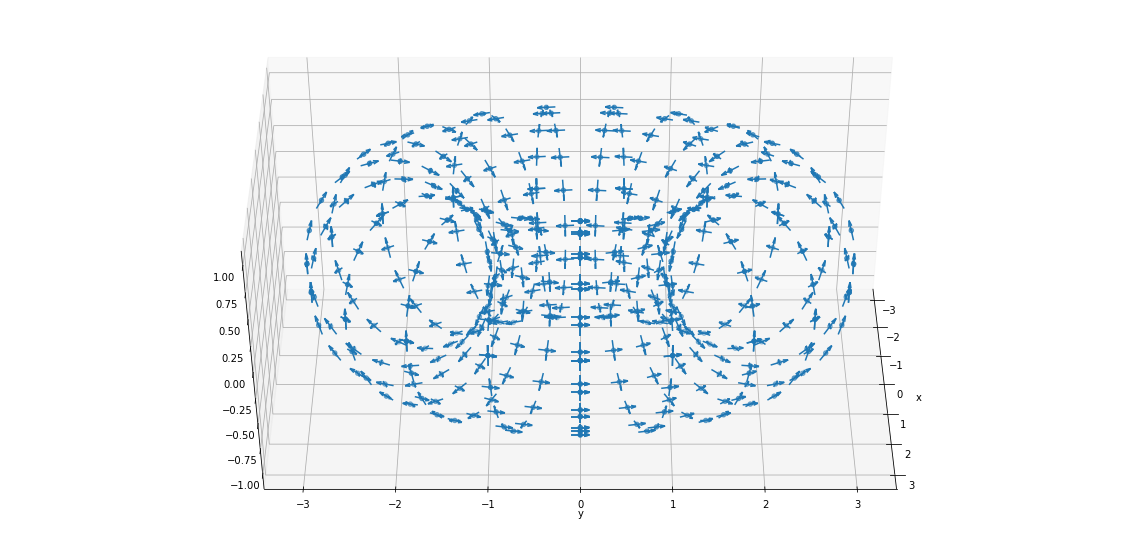

In [331]:
def plot_tangent(n = 10):
    fig = plt.figure(figsize=(20,10))
    ax = plt.axes(projection="3d")
    ax.view_init(40, 0)
    
    tt = torus_tangents(2,1,n)
    pp = torus_points(2,1,n)
    ax.scatter(pp[:, 0], pp[:, 1], pp[:, 2])
    
    pp2 = np.tile(pp,(2,1))
    tt2 = np.concatenate([tt[:,0,:], tt[:,1,:]])
    ax.quiver(pp2[:,0], pp2[:,1], pp2[:,2], tt2[:,0], tt2[:,1], tt2[:,2], pivot='middle', length=0.2)#, headwidth=1, width=0.001, scale=60)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    
plot_tangent(20)

Let's look a one slice

In [339]:
def torus_points2(r1, r2, u, v):
    uu, vv = np.meshgrid(u, v)
    x = (r1 + r2*np.cos(vv))*np.cos(uu)
    y = (r1 + r2*np.cos(vv))*np.sin(uu)
    z = r2*np.sin(vv)
    return np.stack([x,y,z]).T.reshape(-1, 3)

def torus_tangents2(r1, r2, u, v):
    uu, vv = np.meshgrid(u, v)
    x = (r1 + r2*np.cos(vv))*np.cos(uu)
    y = (r1 + r2*np.cos(vv))*np.sin(uu)
    z = r2*np.sin(vv)
    
    t_u = np.stack([-np.sin(uu), np.cos(uu), uu*0])
    t_v = np.stack([-np.cos(uu)*np.sin(vv),
                    -np.sin(uu)*np.sin(vv),
                    np.cos(vv)])
    # 2 3 10 10
    t = np.stack([t_u, t_v]).T.reshape(-1, 3, 2).transpose(0,2,1)
    return t

In [562]:
def plot_tangent2(pp, tt, a=45, b=0):
    fig = plt.figure(figsize=(20,10))
    ax = plt.axes(projection="3d")
    ax.view_init(a, b)
    ax.set_proj_type('persp')
    
    ax.scatter(pp[:, 0], pp[:, 1], pp[:, 2])
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.set_zlim(-1,1)
    
    pp2 = np.tile(pp,(2,1))
    tt2 = np.concatenate([tt[:,0,:], tt[:,1,:]])
#     ax.quiver(pp2[:,0], pp2[:,1], pp2[:,2], tt2[:,0], tt2[:,1], tt2[:,2], pivot='middle', length=0.4)
    ax.quiver(pp[:,0], pp[:,1], pp[:,2], tt[:,0,0], tt[:,0,1], tt[:,0,2],
                colors='blue',
              pivot='middle', length=0.3)
    ax.quiver(pp[:,0], pp[:,1], pp[:,2], tt[:,1,0], tt[:,1,1], tt[:,1,2],
                colors='red',
              pivot='middle', length=0.3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [545]:
def plot_points2(points, a=45, b=0):
    fig = plt.figure(figsize=(15,7))
    ax = plt.axes(projection="3d")
    ax.view_init(a, b)
    ax.scatter(points[:, 0], points[:, 1], points[:, 2])
    
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_zlim(-1,1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

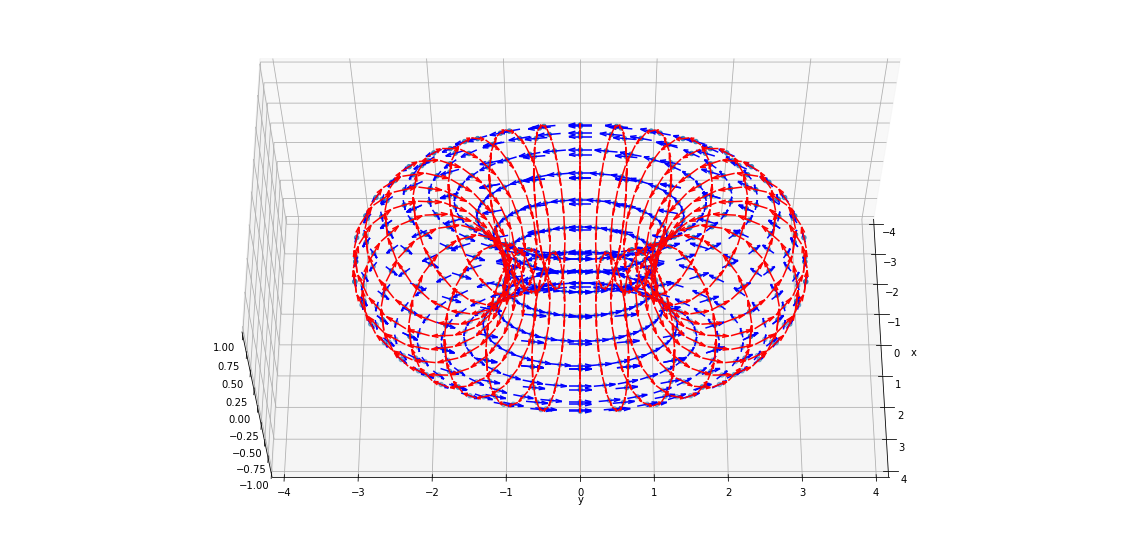

In [546]:
u = np.linspace(0,2*np.pi, 30, endpoint=False)
v = np.linspace(0, 2*np.pi, 20)
pp = torus_points2(2, 1, u, v)
tt= torus_tangents2(2, 1, u, v)

    
plot_tangent2(pp,tt,60,0)

### lets use x,y,z to compute tangent vectors

In [448]:
def torus_tangents3(r1, r2, pp):
    # pp is N,3
    # output is N,2,3
    uu = np.arctan2(pp[:,1], pp[:,0]) # N
    su = np.sin(uu)
    cu = np.cos(uu)
    t_u = np.stack([-su, cu, np.zeros_like(uu)])
    
    sv = pp[:,2] / r2
    cv = np.sqrt(1 - sv**2)
    where_cos_neg = pp[:,0]**2 + pp[:,1]**2 <= r1**2
    cv[where_cos_neg] *= -1
      
    t_v = np.stack([-cu*sv, -su*sv, cv])
    # 2 3 10 10
    t = np.stack([t_u, t_v]).T.reshape(-1, 3, 2).transpose(0,2,1)
    return t

In [449]:
tt.shape

(600, 2, 3)

t_u error [1.97279478e-15 1.33486718e-15 0.00000000e+00]
t_v error [9.76771017e-16 1.36988247e-15 2.39648140e-15]


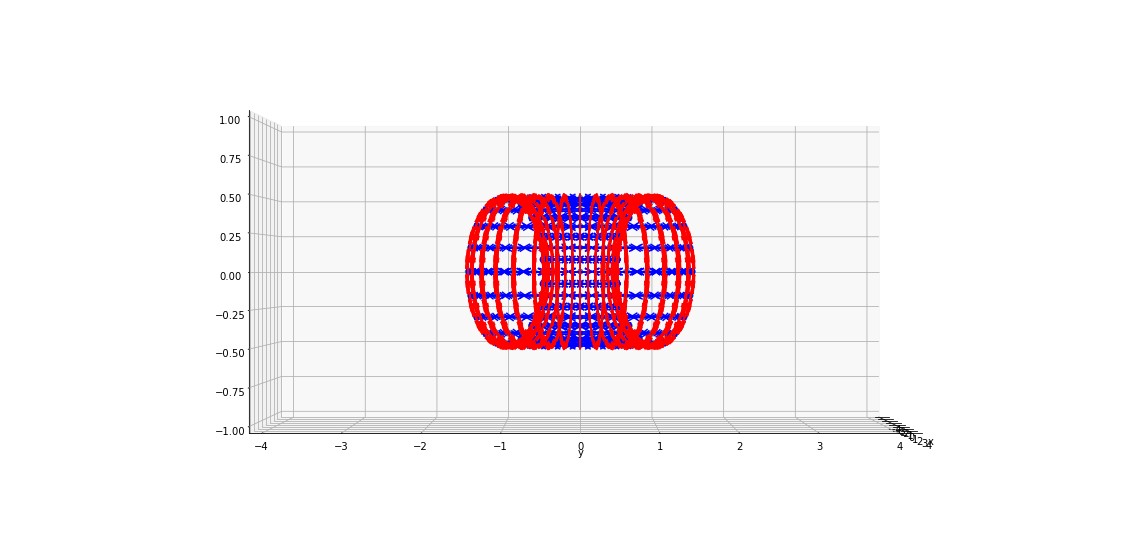

In [456]:
u = np.linspace(0,2*np.pi, 30, endpoint=False)
v = np.linspace(0, 2*np.pi, 20)
pp = torus_points2(1, 0.5, u, v)
tt = torus_tangents2(1, 0.5, u, v)
tt2 = torus_tangents3(1, 0.5, pp)
print(f"t_u error {np.linalg.norm(tt[:,0,:] - tt2[:,0,:], axis=0)}")
print(f"t_v error {np.linalg.norm(tt[:,1,:] - tt2[:,1,:], axis=0)}")

plot_tangent2(pp, tt2, a=0, b=0)

### load pie stuff and compare with ameisin tiger formula

In [458]:
import xml.dom.minidom
fileName = 'torus1n2.xml'
doc = xml.dom.minidom.parse(fileName);

In [459]:
doc

In [502]:
vpos = doc.getElementsByTagName("vertexPositions")[0]

In [509]:
def get_vector3_in_element(domElement):
    res = []
    for v in domElement.getElementsByTagName("Vector3"):
        x,y,z = v.childNodes[1], v.childNodes[3], v.childNodes[5]
        x,y,z = map(lambda x: float(x.firstChild.data), [x,y,z])
        vec = np.array([x,y,z])
        res.append(vec)

    res = np.stack(res)
    return res

In [510]:
positions = get_vector3_in_element(vpos)
positions.shape

(6912, 3)

In [549]:
pdirections = []
for i in range(4):
    domElement = doc.getElementsByTagName(f"principalDirections{i}")[0]
    pdirections.append(get_vector3_in_element(domElement))
    
pdirections = np.stack(pdirections).transpose(1,0,2)

In [550]:
pdirections.shape

(6912, 4, 3)

In [522]:
tangents_for_positions = torus_tangents3(1, 0.5, positions)
tangents_for_positions.shape

(6912, 2, 3)

In [586]:
def error(p, set_p):
    # p is K
    # set_p is N,K
    e1 = np.min(np.linalg.norm(set_p - p, axis=1), axis=0)
    e2 = np.min(np.linalg.norm(set_p + p, axis=1), axis=0)
    return min(e1,e2)

In [572]:
subset_idx = np.random.choice(positions.shape[0], size=100, replace=False)

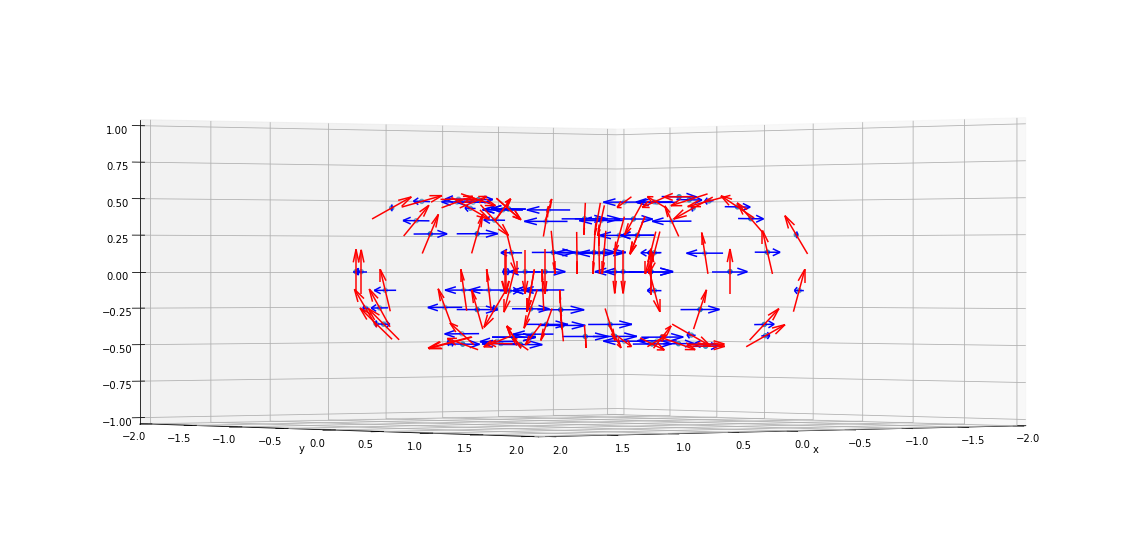

In [573]:
plot_tangent2(positions[subset_idx], tangents_for_positions[subset_idx,:2,:], 0, 50)

In [594]:
errors = []

for pos,dirs,dirs_a in zip(positions, pdirections[:,:2,:], tangents_for_positions):
    # pos is 3
    # dirs is 2,3
    # dirs_a is 2,3
    errs = np.linalg.norm(dirs - dirs_a, axis=1)
    errors.append(np.array(errs))
    
errors = np.stack(errors)

In [595]:
errors.shape

(6912, 2)

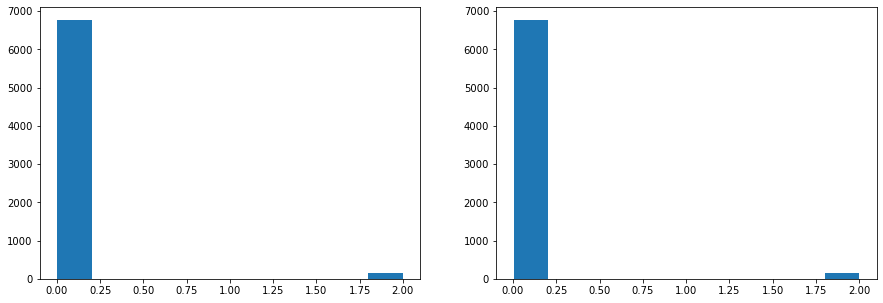

In [613]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
for err, ax in zip(errors.T, axs):
    ax.hist(err)
plt.show()

In [614]:
np.mean(errors, axis=0)

array([0.04912647, 0.05142447])

In [615]:
np.mean(errors)

0.050275469384337405

In [617]:
print (tangents_for_positions[0:10, :2,:])

[[[-1.22464680e-16 -1.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00 -0.00000000e+00  1.00000000e+00]]

 [[-1.22464680e-16 -1.00000000e+00  0.00000000e+00]
  [ 2.58819044e-01 -3.16961914e-17  9.65925827e-01]]

 [[-1.30526179e-01 -9.91444863e-01  0.00000000e+00]
  [ 2.56604841e-01 -3.37826649e-02  9.65925819e-01]]

 [[-1.22464680e-16 -1.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00 -0.00000000e+00  1.00000000e+00]]

 [[-1.30526179e-01 -9.91444863e-01  0.00000000e+00]
  [ 2.56604841e-01 -3.37826649e-02  9.65925819e-01]]

 [[-1.30526170e-01 -9.91444864e-01  0.00000000e+00]
  [ 0.00000000e+00 -0.00000000e+00  1.00000000e+00]]

 [[-1.22464680e-16 -1.00000000e+00  0.00000000e+00]
  [ 2.58819044e-01 -3.16961914e-17  9.65925827e-01]]

 [[-1.30526181e-01 -9.91444863e-01  0.00000000e+00]
  [ 4.95722431e-01 -6.52630903e-02  8.66025404e-01]]

 [[-1.30526179e-01 -9.91444863e-01  0.00000000e+00]
  [ 2.56604841e-01 -3.37826649e-02  9.65925819e-01]]

 [[-1.22464680e-16 -1.00000000e+00  0.00000000